In [104]:
#Import some libraries to perform some calculations, visualization, plotting, remove warnings and other usage of functions

import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import sklearn
import numpy as np
import datetime as dt
import math
import scipy as sp
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

## *Customer Demography*

In [2]:
#Load the customer demography dataset of KPMG and stored in variable called demo:

demo = pd.read_csv("/content/Cus_Demography.csv - Sheet1.csv")
demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-1.00E+02,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [3]:
#This command gives the information of demography dataset:

demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [4]:
#This command gives the static information of demography dataset:

demo.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [5]:
#This command shows the order pair of demography dataset:

demo.shape

(4000, 13)

In [6]:
#This command shows the columns of demography dataset:

demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [7]:
#This command gives the duplicated values  of demography dataset:

demo.duplicated().sum()

0

In [8]:
#This command gives the missing values of demography dataset:

demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [9]:
#This command Drops the missing values:

demo.dropna(inplace = True)
demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
dtype: int64

In [10]:
#This command shows the order pair of demography dataset after dropping missing rows:

demo.shape

(2630, 13)

In [11]:
#This command counts the value of deceased_indicator column:

demo.deceased_indicator.value_counts()

N    2628
Y       2
Name: deceased_indicator, dtype: int64

In [12]:
#This command drops some columns:

demo.drop(['first_name', 'last_name', 'default', 'job_title', 'deceased_indicator'], axis=1, inplace=True)

In [13]:
#This command shows the order pair of demography dataset after dropping some columns:

demo.shape

(2630, 8)

In [14]:
#This command shows the first 5 rows of demography dataset:

demo.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
0,1,F,93,1953-10-12,Health,Mass Customer,Yes,11.0
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0
2,3,Male,61,1954-01-20,Property,Mass Customer,Yes,15.0
8,9,Female,97,1973-03-10,Argiculture,Affluent Customer,Yes,8.0
9,10,Female,49,1988-10-11,Financial Services,Mass Customer,Yes,20.0


In [15]:
#This command counts the value of gender column:

demo.gender.value_counts()

Female    1366
Male      1262
F            1
Femal        1
Name: gender, dtype: int64

In [16]:
#This command replace some values in gender column:

demo['gender'].replace({'F' : 'Female'}, inplace=True)
demo['gender'].replace({'Femal' : 'Female'}, inplace=True)

In [17]:
#This command counts the value of gender column after editing:

demo.gender.value_counts()

Female    1368
Male      1262
Name: gender, dtype: int64

In [18]:
#This command counts the value of DOB column:

demo.DOB.value_counts

<bound method IndexOpsMixin.value_counts of 0       1953-10-12
1       1980-12-16
2       1954-01-20
8       1973-03-10
9       1988-10-11
           ...    
3992    1974-12-05
3993    1989-04-07
3994    1975-12-12
3995    1975-08-09
3996    2001-07-13
Name: DOB, Length: 2630, dtype: object>

In [19]:
#This command converts DOB column into age and create new age column:

demo['DOB'] = pd.to_datetime(demo['DOB'])
demo['age'] = (dt.datetime.now() - demo['DOB']) / np.timedelta64(1, 'Y')

In [20]:
#This command counts the value of age column:

demo.age.value_counts

<bound method IndexOpsMixin.value_counts of 0       70.149663
1       42.970460
2       69.875872
8       50.740640
9       35.150997
          ...    
3992    49.002069
3993    34.663650
3994    47.983568
3995    48.325806
3996    22.397827
Name: age, Length: 2630, dtype: float64>

In [21]:
#This command givs the minimum and maximum value of age column:

print(demo['age'].min(), demo['age'].max())

21.73799103021743 92.12136645887101


In [22]:
#Following command create age_group column for calculation purpose:

ag = pd.Series(['20-34','35-49', '50-64', '65-79', '80-94'], dtype='category')
demo['age_group'] = ag

demo.loc[demo['age']<=34, 'age_group'] = ag[0]
demo.loc[(demo['age']>34) & (demo['age']<=49), 'age_group'] = ag[1]
demo.loc[(demo['age']>49) & (demo['age']<=64), 'age_group'] = ag[2]
demo.loc[(demo['age']>64) & (demo['age']<=79), 'age_group'] = ag[3]
demo.loc[demo['age']>79, 'age_group'] = ag[4]

#This command shows the information for demography dataset:
print(demo.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 0 to 3996
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2630 non-null   int64         
 1   gender                               2630 non-null   object        
 2   past_3_years_bike_related_purchases  2630 non-null   int64         
 3   DOB                                  2630 non-null   datetime64[ns]
 4   job_industry_category                2630 non-null   object        
 5   wealth_segment                       2630 non-null   object        
 6   owns_car                             2630 non-null   object        
 7   tenure                               2630 non-null   float64       
 8   age                                  2630 non-null   float64       
 9   age_group                            2630 non-null   category      
dtypes: category(

In [23]:
#This command gives first 5 rows of demography dataset:

demo.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_group
0,1,Female,93,1953-10-12,Health,Mass Customer,Yes,11.0,70.149663,65-79
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0,42.970460,35-49
2,3,Male,61,1954-01-20,Property,Mass Customer,Yes,15.0,69.875872,65-79
8,9,Female,97,1973-03-10,Argiculture,Affluent Customer,Yes,8.0,50.740640,50-64
9,10,Female,49,1988-10-11,Financial Services,Mass Customer,Yes,20.0,35.150997,35-49


## *Customer Address*

In [24]:
#Load the Customer Address dataset of KPMG and stored in variable called addr:

addr = pd.read_csv("/content/Cus_Address.csv - Sheet1.csv")
addr

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [25]:
#This command shows the information of address dataset:

addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [26]:
#This command shows the Static values of address dataset:

addr.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [27]:
#This command shows the order pair of address dataset:

addr.shape

(3999, 6)

In [28]:
#This command shows the columns of address dataset:

addr.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [29]:
#This command calculate the duplicate values of address dataset:

addr.duplicated().sum()

0

In [30]:
#This command calculate the missing values of address dataset:

addr.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [31]:
#This command counts the value of state column:

addr.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [32]:
#This command replace some values in state column:

addr['state'].replace({'New South Wales' : 'NSW'}, inplace=True)
addr['state'].replace({'Victoria' : 'VIC'}, inplace=True)

In [33]:
#This command counts the value of state column:

addr.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [34]:
#This command shows the first 5 rows of adreess dataset:

addr.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


## *Customer Transaction*

In [35]:
#Load the Customer Transaction dataset of KPMG and stored in variable called trans:

trans = pd.read_csv("/content/Transaction.csv - Sheet1.csv")
trans

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,1018,6/24/2017,True,Approved,OHM Cycles,Standard,high,medium,2005.66,"$1,203.40",37823.0
19996,127,11/9/2017,True,Approved,Solex,Road,medium,medium,416.98,$312.74,35560.0
19997,2284,4/14/2017,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,$44.71,40410.0
19998,2764,7/3/2017,False,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,38216.0


In [36]:
#This command give the information of transaction dataset:

trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              20000 non-null  int64  
 1   transaction_date         20000 non-null  object 
 2   online_order             19640 non-null  object 
 3   order_status             20000 non-null  object 
 4   brand                    19803 non-null  object 
 5   product_line             19803 non-null  object 
 6   product_class            19803 non-null  object 
 7   product_size             19803 non-null  object 
 8   list_price               20000 non-null  float64
 9   standard_cost            19803 non-null  object 
 10  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.7+ MB


In [37]:
#This command gives the static values of transaction dataset:

trans.describe()

,customer_id,list_price,product_first_sold_date
count,20000.000000,20000.000000,19803.000000
mean,1738.246050,1107.829449,38199.776549
std,1011.951046,582.825242,2875.201110
min,1.000000,12.010000,33259.000000
25%,857.750000,575.270000,35667.000000
50%,1736.000000,1163.890000,38216.000000
75%,2613.000000,1635.300000,40672.000000
max,5034.000000,2091.470000,42710.000000


In [38]:
#This command shows the order pair of transaction dataset:

trans.shape

(20000, 11)

In [39]:
#This command shows the column of transaction dataset:

trans.columns

Index(['customer_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date'],
      dtype='object')

In [40]:
#This command calculate dupliate values of transaction dataset:

trans.duplicated().sum()

0

In [41]:
#This command calculate mising values of transaction dataset:

trans.isnull().sum()

customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [42]:
trans = trans.query("order_status == ['Approved']")

In [43]:
#This command drops the missing values in trasaction dataset:

trans.dropna(inplace = True)
trans.isnull().sum()

customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [44]:
#This command shows the order pair of transaction dataset after drops missing rows:

trans.shape

(19273, 11)

In [45]:
#This command counts value in product_first_sold_date column:

trans.product_first_sold_date.value_counts()

33879.0    228
41064.0    222
37823.0    219
39880.0    218
38482.0    214
          ... 
42404.0    166
41848.0    166
41922.0    161
37659.0    160
34586.0    157
Name: product_first_sold_date, Length: 100, dtype: int64

In [46]:
#This command change product_first_sold_date datatype:

trans['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date'], unit='s')

In [47]:
#This command shows the value of trans.product_first_sold_date column:

trans.product_first_sold_date

0       1970-01-01 11:27:25
1       1970-01-01 11:35:01
2       1970-01-01 10:06:01
3       1970-01-01 10:02:25
4       1970-01-01 11:43:46
                ...        
19995   1970-01-01 10:30:23
19996   1970-01-01 09:52:40
19997   1970-01-01 11:13:30
19998   1970-01-01 10:36:56
19999   1970-01-01 10:05:34
Name: product_first_sold_date, Length: 19273, dtype: datetime64[ns]

In [48]:
#This command counts the value of standard_cost column:

trans.standard_cost.value_counts()

$388.92        456
$954.82        387
$53.62         268
$161.60        229
$260.14        228
              ... 
$151.96        123
$206.35        111
312.7350159      1
270.2999878      1
667.4000244      1
Name: standard_cost, Length: 103, dtype: int64

In [49]:
#this command gives the data type of standard_cost column:

print(trans['standard_cost'].dtypes)

object


In [50]:
#thus command is used to modify the attributes in standard_cost column:

trans['standard_cost'] = trans['standard_cost'].str.replace(',', '').str.replace('$', '').astype(float).round(decimals = 2)

In [51]:
#thus command is used to modify the attributes in list_price column:

trans['list_price'] = trans['list_price'].replace('$', '').round(decimals = 2)

In [52]:
#this command gives the data type of standard_cost column and list_price column:

print("D-type of list_price is: ", trans['list_price'].dtype)
print("D-type of Standard_cost is: ",trans['standard_cost'].dtype)

D-type of list_price is:  float64
D-type of Standard_cost is:  float64


In [53]:
#This command is used for creating profit column in transaction dataset:

trans['profit'] = trans['list_price'] - trans['standard_cost']

In [54]:
#This command is used to show first 5 rows of transaction dataset:

trans.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87
1,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55
2,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61
3,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36
4,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1055.82


In [55]:
#This command is used to modify datatype of transaction_date column:

trans['transaction_date'] = pd.to_datetime(trans['transaction_date'])

In [56]:
#The cammand is used to create column called recency in transaction dataset:

trans['recency'] = (trans['transaction_date'].max() - trans['transaction_date']) / np.timedelta64(1,'D')

#The couple of line of cammand is used to create a dataset called rfm_df:
rfm_df = trans.groupby('customer_id').aggregate({'recency':'min', 'customer_id':'count', 'profit':'sum'})

rfm_df.rename(columns={'customer_id':'frequency'}, inplace=True)

In [57]:
#This command shows the first 5 rows of rfm_df dataset:

rfm_df.head()

,recency,frequency,profit
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [58]:
#This command is used to create r, f, m column in rfm_df dataset:
# Create R, F and M score columns
# A scale of 1 - 4 was used
# 4 for quartiles [0, 0.25, 0.50, 0.75, 1]

rfm_df['r'] = pd.qcut(rfm_df['recency'], q=4, labels=[4, 3, 2, 1])
rfm_df['f'] = pd.qcut(rfm_df['frequency'], q=4, labels=[1, 2, 3, 4])
rfm_df['m'] = pd.qcut(rfm_df['profit'], q=4, labels=[1, 2, 3, 4])

rfm_df.head()

,recency,frequency,profit,r,f,m
customer_id,,,,,,
1,7.0,11,3018.09,4,4,3
2,128.0,3,2226.26,1,1,2
3,102.0,7,3290.21,1,3,3
4,195.0,2,220.57,1,1,1
5,16.0,6,2394.94,4,3,2


In [59]:
#This command is used to create rfm_score column based on r, f, m values:

rfm_df['rfm_score'] = 100*rfm_df['r'].astype(int) + 10*rfm_df['f'].astype(int) + rfm_df['m'].astype(int)
rfm_df.head()

,recency,frequency,profit,r,f,m,rfm_score
customer_id,,,,,,,
1,7.0,11,3018.09,4,4,3,443
2,128.0,3,2226.26,1,1,2,112
3,102.0,7,3290.21,1,3,3,133
4,195.0,2,220.57,1,1,1,111
5,16.0,6,2394.94,4,3,2,432


In [60]:
#This command is used to show the datatype of rfm_score column:

rfm_df.rfm_score.dtype

dtype('int64')

In [61]:
#This command is used to create a customer_profile column based on rfm_score column:

rfm_df['customer_profile'] = pd.qcut(rfm_df['rfm_score'], q=4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])

In [62]:
#This command gives the information and as well as first 5 rows of rfm_df dataset:

print(rfm_df.info())
rfm_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 1 to 5034
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   recency           3490 non-null   float64 
 1   frequency         3490 non-null   int64   
 2   profit            3490 non-null   float64 
 3   r                 3490 non-null   category
 4   f                 3490 non-null   category
 5   m                 3490 non-null   category
 6   rfm_score         3490 non-null   int64   
 7   customer_profile  3490 non-null   category
dtypes: category(4), float64(2), int64(2)
memory usage: 150.8 KB
None


,recency,frequency,profit,r,f,m,rfm_score,customer_profile
customer_id,,,,,,,,
1,7.0,11,3018.09,4,4,3,443,Platinum
2,128.0,3,2226.26,1,1,2,112,Bronze
3,102.0,7,3290.21,1,3,3,133,Bronze
4,195.0,2,220.57,1,1,1,111,Bronze
5,16.0,6,2394.94,4,3,2,432,Platinum


In [63]:
#This command gives the first 5 rows of transaction dataset:

trans.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,recency
0,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87,308.0
1,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55,223.0
2,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61,75.0
3,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36,121.0
4,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1055.82,90.0


## *Merge dataset*

In [64]:
#This command create a dataset called "dataset" based on uper 4 datasets:
# Join Customer Demographic, Customer Address and RFM score dataframes on customer id:

dataset = rfm_df.merge(addr.merge(demo, how='inner', on='customer_id'), how='inner', on='customer_id')

print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2325 non-null   int64         
 1   recency                              2325 non-null   float64       
 2   frequency                            2325 non-null   int64         
 3   profit                               2325 non-null   float64       
 4   r                                    2325 non-null   category      
 5   f                                    2325 non-null   category      
 6   m                                    2325 non-null   category      
 7   rfm_score                            2325 non-null   int64         
 8   customer_profile                     2325 non-null   category      
 9   address                              2325 non-null   object        
 10  postcode    

,customer_id,recency,frequency,profit,r,f,m,rfm_score,customer_profile,address,...,property_valuation,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_group
0,1,7.0,11,3018.09,4,4,3,443,Platinum,060 Morning Avenue,...,10,Female,93,1953-10-12,Health,Mass Customer,Yes,11.0,70.149663,65-79
1,2,128.0,3,2226.26,1,1,2,112,Bronze,6 Meadow Vale Court,...,10,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0,42.970460,35-49
2,9,78.0,6,2353.11,2,3,2,232,Silver,97736 7th Trail,...,12,Female,97,1973-03-10,Argiculture,Affluent Customer,Yes,8.0,50.740640,50-64
3,12,67.0,7,3540.03,2,3,3,233,Silver,44339 Golden Leaf Alley,...,4,Male,58,1994-07-21,Manufacturing,Mass Customer,No,8.0,29.376752,20-34
4,13,27.0,7,4337.38,3,3,4,334,Gold,2 Sutherland Street,...,6,Male,38,1955-02-15,Financial Services,High Net Worth,Yes,8.0,68.805350,65-79


In [65]:
#This command is used to convert and as well as save the dataset:

dataset.to_csv('dataset.csv', index=False)

In [66]:
#This command gives the order pair of dataset:

dataset.shape

(2325, 23)

In [67]:
#This command gives the information of dataset:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2325 non-null   int64         
 1   recency                              2325 non-null   float64       
 2   frequency                            2325 non-null   int64         
 3   profit                               2325 non-null   float64       
 4   r                                    2325 non-null   category      
 5   f                                    2325 non-null   category      
 6   m                                    2325 non-null   category      
 7   rfm_score                            2325 non-null   int64         
 8   customer_profile                     2325 non-null   category      
 9   address                              2325 non-null   object        
 10  postcode    

In [68]:
#This command gives the static values of dataset:

dataset.describe()

,customer_id,recency,frequency,profit,rfm_score,postcode,property_valuation,past_3_years_bike_related_purchases,tenure,age
count,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000
mean,1724.224516,62.974194,5.523871,3047.687140,277.354409,2987.420645,7.513978,49.209462,10.739355,46.129479
std,1010.355330,60.104336,2.262080,1770.657023,116.677347,857.273903,2.823463,28.626828,5.683114,12.443453
min,1.000000,0.000000,1.000000,15.080000,111.000000,2000.000000,1.000000,0.000000,1.000000,21.737991
25%,842.000000,18.000000,4.000000,1774.120000,211.000000,2193.000000,6.000000,25.000000,6.000000,36.634943
50%,1720.000000,45.000000,5.000000,2770.850000,311.000000,2766.000000,8.000000,48.000000,11.000000,46.206666
75%,2592.000000,88.000000,7.000000,4067.640000,411.000000,3752.000000,10.000000,73.000000,16.000000,55.208904
max,3497.000000,353.000000,14.000000,11668.950000,444.000000,4883.000000,12.000000,99.000000,22.000000,92.121366


In [69]:
#This command shows the columns of dataset:

dataset.columns

Index(['customer_id', 'recency', 'frequency', 'profit', 'r', 'f', 'm',
       'rfm_score', 'customer_profile', 'address', 'postcode', 'state',
       'country', 'property_valuation', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'age_group'],
      dtype='object')

In [70]:
#This command calculates the duplicate values of dataset:

dataset.duplicated().sum()

0

In [71]:
#This command goves the missing values of dataset if there is:

dataset.isnull().sum()

customer_id                            0
recency                                0
frequency                              0
profit                                 0
r                                      0
f                                      0
m                                      0
rfm_score                              0
customer_profile                       0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
age                                    0
age_group                              0
dtype: int64

In [72]:
#This command counts the gender column:

dataset.gender.value_counts()

Female    1187
Male      1138
Name: gender, dtype: int64

## *New Customer List*

In [73]:
#Load the New_1000_Customer_List dataset of KPMG and stored in variable called new_c:

new_c = pd.read_csv("/content/Cus_Newlist.csv - Sheet1.csv")
new_c

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6.0,1.07,1.3375,1.671875,1.421094,#REF!,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11.0,1.08,1.0800,1.350000,1.147500,#REF!,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5.0,0.51,0.5100,0.510000,0.510000,#REF!,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1.0,0.97,1.2125,1.212500,1.212500,#REF!,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9.0,0.96,0.9600,1.200000,1.200000,#REF!,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7.0,1.01,1.0100,1.010000,1.010000,#REF!,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10.0,0.59,0.5900,0.737500,0.626875,#REF!,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2.0,1.10,1.3750,1.375000,1.375000,#REF!,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2.0,0.68,0.8500,0.850000,0.722500,#REF!,997,0.357000


In [74]:
#This command gives the information of new_cut_list dataset:

new_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [75]:
#This command gives the static values of new_cut_list dataset:

new_c.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.743200,0.833737,0.937824,0.866467,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.211594,0.253637,0.305892,0.291796,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.560000,0.612500,0.700000,0.630000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.730000,0.820000,0.900000,0.839375,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.930000,1.010000,1.140625,1.062500,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1.718750


In [76]:
#This command gives the order pair of new_cut_list dataset:

new_c.shape

(1000, 23)

In [77]:
#This command gives the column name of new_cut_list dataset:

new_c.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [78]:
#This command shows the duplicate values of new_cut_list dataset:

new_c.duplicated().sum()

0

In [79]:
#This command shows the missing values of new_cut_list dataset:

new_c.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [80]:
#This command drops some column:

new_c.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [81]:
#This command gives the order pair of new_cut_list dataset after dropping columns:

new_c.shape

(1000, 18)

In [82]:
#This command drops the missing rows:

new_c.dropna(inplace = True)
new_c.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [83]:
#This command gives the order pair of new_cut_list dataset after dropping missing rows:

new_c.shape

(715, 18)

In [84]:
#This command creates agre column based on DOB column:

new_c['DOB'] = pd.to_datetime(new_c['DOB'])
new_c['age'] = (dt.datetime.now() - new_c['DOB']) / np.timedelta64(1, 'Y')

In [85]:
#This command shows the maximum and minimum values in age column:

print("max age is: ",new_c.age.max())
print("min age is: ",new_c.age.min())

max age is:  85.4956364893638
min age is:  21.883105088992814


In [86]:
#This command create age_group column based on age column in new_customer_list dataset:

ag = pd.Series(['20-34','35-49', '50-64', '65-79', '80-94'], dtype='category')
new_c['age_group'] = ag

new_c.loc[new_c['age']<=34, 'age_group'] = ag[0]
new_c.loc[(new_c['age']>34) & (new_c['age']<=49), 'age_group'] = ag[1]
new_c.loc[(new_c['age']>49) & (new_c['age']<=64), 'age_group'] = ag[2]
new_c.loc[(new_c['age']>64) & (new_c['age']<=79), 'age_group'] = ag[3]
new_c.loc[new_c['age']>79, 'age_group'] = ag[4]

In [87]:
#This command shows the information of dataset and as well as it's first 5 rows:

print(new_c.info())
new_c.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           715 non-null    object        
 1   last_name                            715 non-null    object        
 2   gender                               715 non-null    object        
 3   past_3_years_bike_related_purchases  715 non-null    int64         
 4   DOB                                  715 non-null    datetime64[ns]
 5   job_title                            715 non-null    object        
 6   job_industry_category                715 non-null    object        
 7   wealth_segment                       715 non-null    object        
 8   deceased_indicator                   715 non-null    object        
 9   owns_car                             715 non-null    object        
 10  tenure        

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6.0,1,1.718750,66.401473,65-79
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11.0,1,1.718750,53.708536,50-64
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5.0,1,1.718750,49.273127,50-64
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1.0,4,1.703125,44.854145,35-49
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9.0,4,1.703125,58.206917,50-64


In [88]:
#This command save the new_customer_list dataset:

new_c.to_csv('NewCustomer_list.csv', index=False)

## *Data Insight Analysis*

In [89]:
#Load the dataset which we created and save in the variable called df:

df = pd.read_csv("/content/dataset.csv")
df

,customer_id,recency,frequency,profit,r,f,m,rfm_score,customer_profile,address,...,property_valuation,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_group
0,1,7.0,11,3018.09,4,4,3,443,Platinum,060 Morning Avenue,...,10,Female,93,1953-10-12,Health,Mass Customer,Yes,11.0,70.149663,65-79
1,2,128.0,3,2226.26,1,1,2,112,Bronze,6 Meadow Vale Court,...,10,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0,42.970460,35-49
2,9,78.0,6,2353.11,2,3,2,232,Silver,97736 7th Trail,...,12,Female,97,1973-03-10,Argiculture,Affluent Customer,Yes,8.0,50.740640,50-64
3,12,67.0,7,3540.03,2,3,3,233,Silver,44339 Golden Leaf Alley,...,4,Male,58,1994-07-21,Manufacturing,Mass Customer,No,8.0,29.376752,20-34
4,13,27.0,7,4337.38,3,3,4,334,Gold,2 Sutherland Street,...,6,Male,38,1955-02-15,Financial Services,High Net Worth,Yes,8.0,68.805350,65-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,3493,93.0,6,3728.88,1,3,3,133,Bronze,3 Monument Crossing,...,10,Male,30,1964-02-29,Health,High Net Worth,No,18.0,59.767519,50-64
2321,3494,4.0,4,2755.11,4,1,2,412,Platinum,35 Chive Alley,...,10,Male,72,1998-12-24,Argiculture,High Net Worth,No,1.0,24.949556,20-34
2322,3495,13.0,7,3847.65,4,3,3,433,Platinum,1 Dayton Park,...,9,Female,57,1987-07-12,Financial Services,High Net Worth,No,8.0,36.402221,35-49
2323,3496,256.0,4,2045.84,1,1,2,112,Bronze,2565 Caliangt Point,...,9,Male,99,1986-04-25,Manufacturing,Mass Customer,Yes,19.0,37.615114,35-49


In [90]:
# Set grid for all figures
sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (8,6)

Text(0.5, 0, 'Gender')

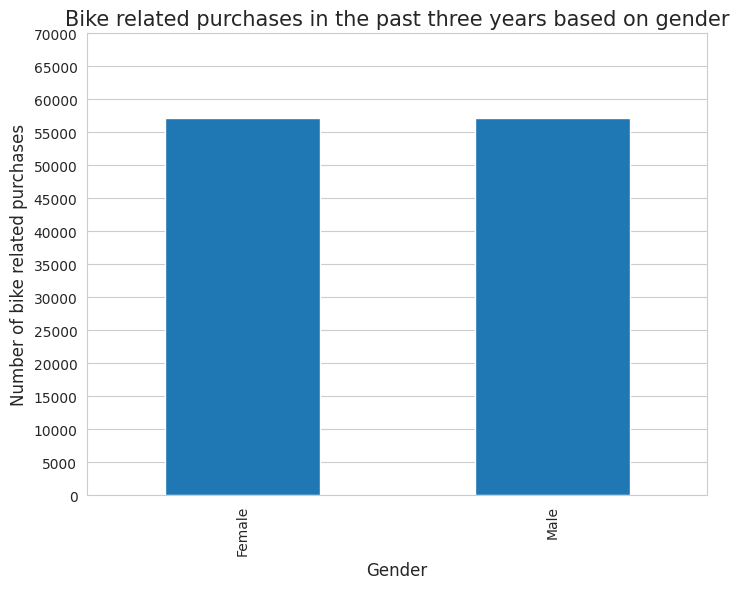

In [91]:
#This command shows the graphical view of gender column based on past_3_years_bike_related_purchases column:

df1 = df.groupby('gender')['past_3_years_bike_related_purchases'].sum()
df1.plot(kind='bar')
plt.grid(axis='x')
plt.title('Bike related purchases in the past three years based on gender', fontsize=15)
plt.ylabel('Number of bike related purchases', fontsize=12)
plt.yticks(np.arange(0, 75000, 5000))
plt.xlabel('Gender', fontsize=12)

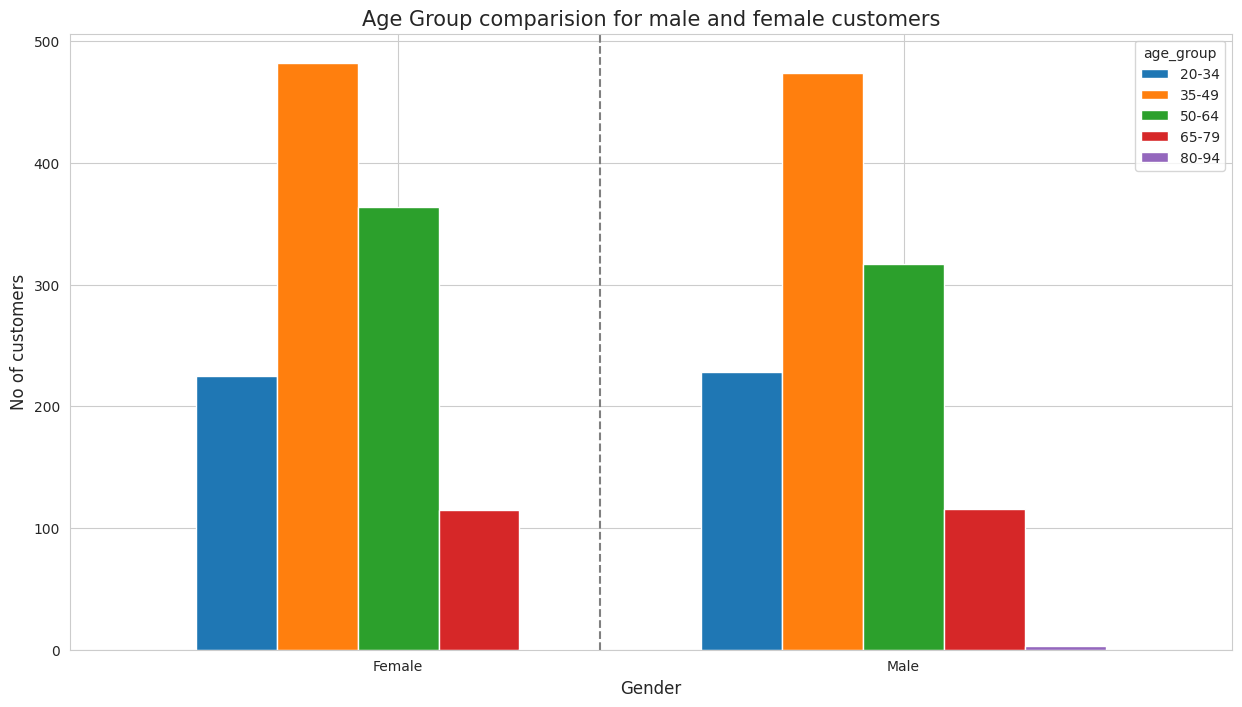

In [94]:
#This command create a count plot of gender column based on age_group column:

counts = df.groupby(['gender', 'age_group']).size().reset_index(name='Count')
pivot_counts = counts.pivot(index='gender', columns='age_group', values='Count')
# Create a bar plot
pivot_counts.plot(kind='bar', figsize=(15, 8), width=0.8)
# Creating a line
plt.axvline(x=4 - 3.6, color='grey', linestyle='--')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('No of customers', fontsize=12)
plt.title('Age Group comparision for male and female customers', fontsize=15)
plt.xticks(rotation = 0)
plt.show()

([<matplotlib.axis.XTick at 0x786284eb8580>,
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9'),
  Text(1.0, 0, '1.0')])

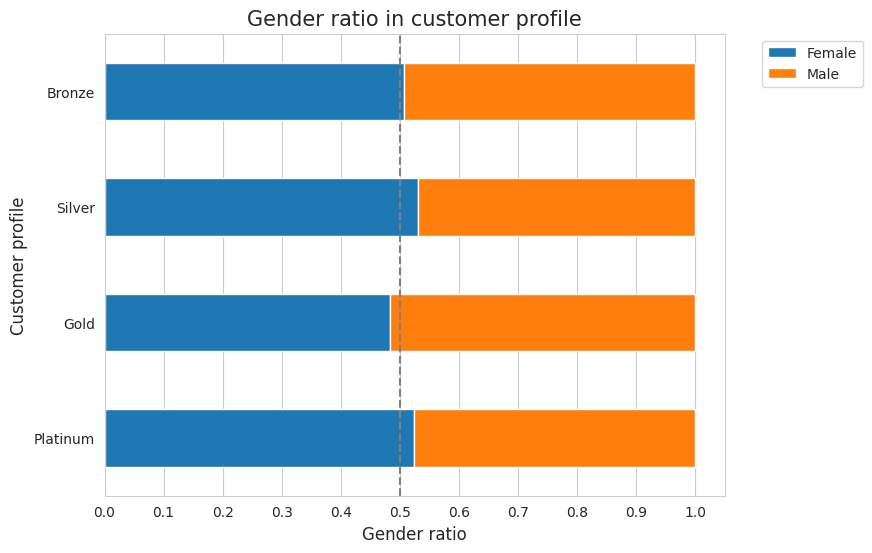

In [95]:
#This command shows the graphical view of customer_profile column based on gender column:

df2 = df.groupby(['customer_profile', 'gender']).size().unstack()
sort_cp = ['Platinum', 'Gold', 'Silver', 'Bronze']
df2 = df2.loc[sort_cp]

df2.apply(lambda x : x/x.sum(), axis=1).plot(kind='barh', stacked=True)
plt.axvline(x=1 - 0.5, color='grey', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.title('Gender ratio in customer profile', fontsize=15)
plt.ylabel('Customer profile', fontsize=12)
plt.xlabel('Gender ratio', fontsize=12)
plt.xticks(np.arange(0, 1+0.1, 0.1))

Text(0.5, 0, 'Gender')

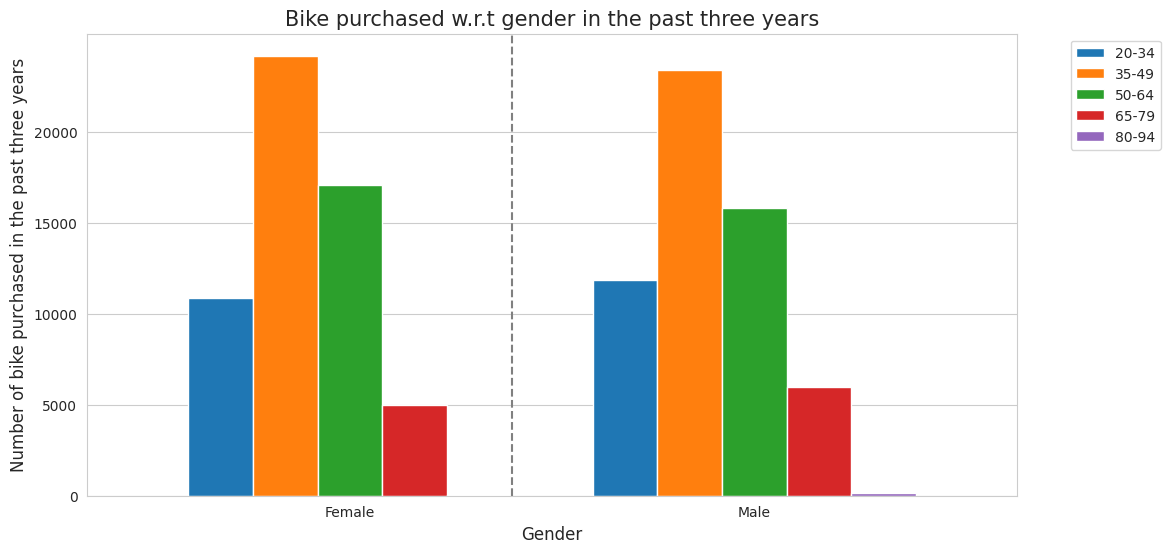

In [96]:
#This command shows the graphical view of gender column by it's age_group column based on past_3_years_bike_related_purchases column:

df1 = df.groupby(['gender', 'age_group'])['past_3_years_bike_related_purchases'].sum().unstack().fillna(0)
df1.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.grid(axis='x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axvline(x=4 - 3.6, color='grey', linestyle='--')
plt.title('Bike purchased w.r.t gender in the past three years', fontsize=15)
plt.ylabel('Number of bike purchased in the past three years', fontsize=12)
plt.yticks(np.arange(0, 25000, 5000))
plt.xticks(rotation = 0)
plt.xlabel('Gender', fontsize=12)

Text(0.5, 0, 'Age group')

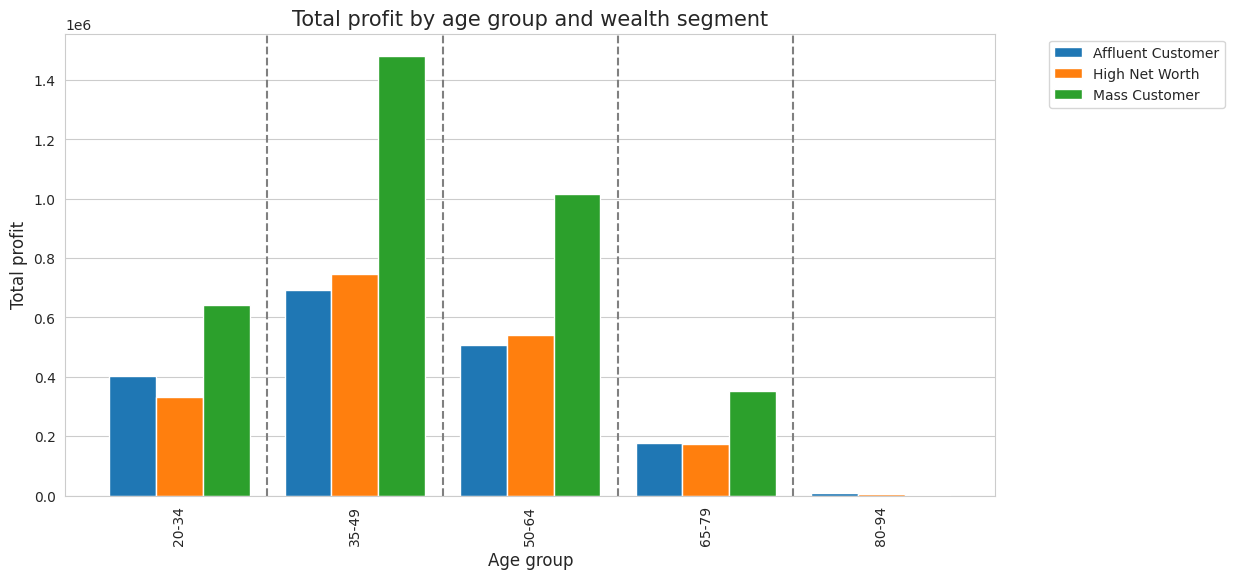

In [98]:
#This command shows the graphical view of age_group column by wealth_segment column based on profit:

df3 = df.groupby(['age_group', 'wealth_segment'])['profit'].sum().unstack().fillna(0)
df3.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.grid(axis = 'x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Creating a line
separation_lines = [1, 2, 3, 4]
for line in separation_lines:
    plt.axvline(x=line - 0.5, color='grey', linestyle='--')
plt.title('Total profit by age group and wealth segment', fontsize=15)
plt.ylabel('Total profit', fontsize=12)
plt.xlabel('Age group', fontsize=12)

Text(0.5, 0, 'Job industry category')

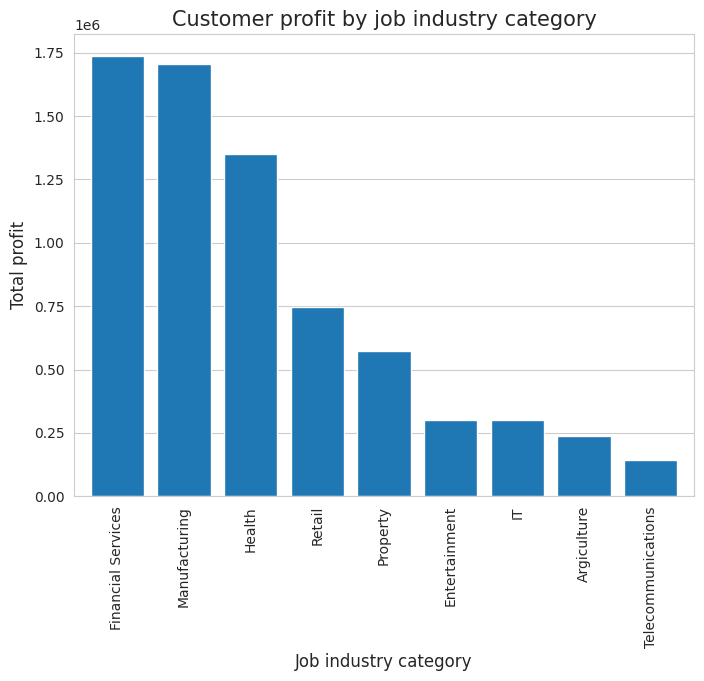

In [99]:
#This command plots the job_industry_category column based on profit:

df4 = df.groupby('job_industry_category')['profit'].sum()
df4 = df4.sort_values(ascending=False)

df4.plot(kind='bar', width=0.8)

plt.grid(axis='x')
plt.title('Customer profit by job industry category', fontsize=15)
plt.ylabel('Total profit', fontsize=12)
plt.xlabel('Job industry category', fontsize=12)

Text(0.5, 0, 'Job industry category')

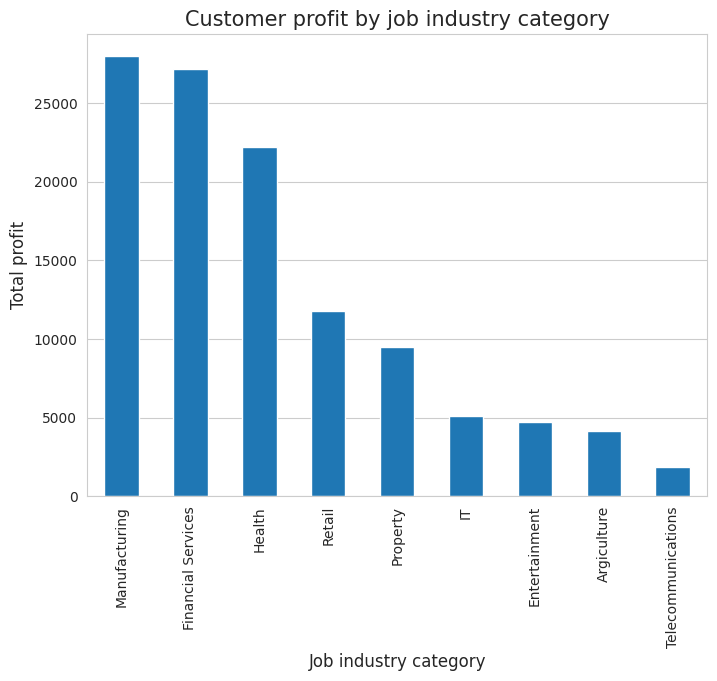

In [100]:
#This command plots the job_industry_category column based on past_3_years_bike_related_purchases:

df5 = df.groupby('job_industry_category')['past_3_years_bike_related_purchases'].sum()
df5 = df5.sort_values(ascending=False)

df5.plot(kind='bar')
plt.grid(axis='x')
plt.title('Customer profit by job industry category', fontsize=15)
plt.ylabel('Total profit', fontsize=12)
plt.xlabel('Job industry category', fontsize=12)


Text(0.5, 0, 'State')

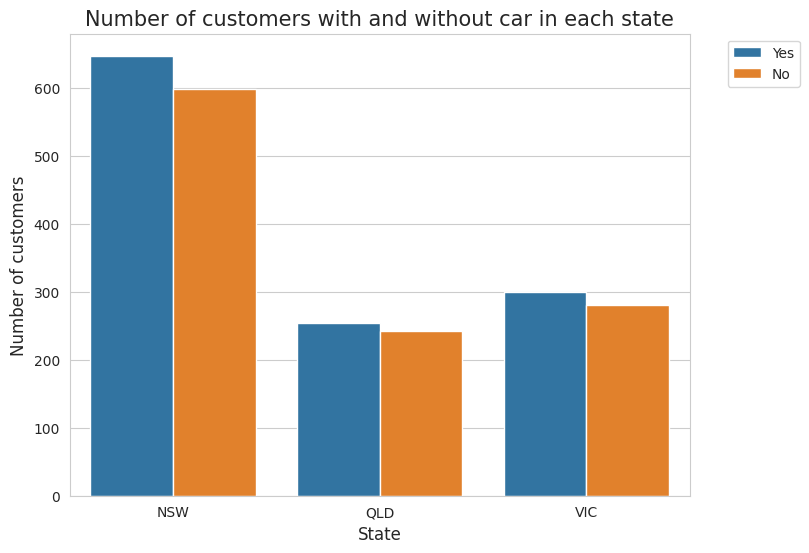

In [101]:
#This command shows the graphical views of state column based on owns_car column:

sns.countplot(x='state', hue='owns_car', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Number of customers with and without car in each state', fontsize=15)
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('State', fontsize=12)

In [102]:
#Load the New_customer_list dataset and save in the variable called reco:

reco = pd.read_csv("/content/NewCustomer_list.csv")
reco.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6.0,1,1.718750,66.401473,65-79
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11.0,1,1.718750,53.708536,50-64
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5.0,1,1.718750,49.273127,50-64
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1.0,4,1.703125,44.854145,35-49
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9.0,4,1.703125,58.206917,50-64


In [103]:
#The couple of line of code gives the high valuable customer in new_1000customer_list:

reco = reco[(reco['age_group']=='35-49') & (reco['wealth_segment']=='Mass Customer') &
                 (reco['gender']=='Female') & (reco['owns_car']=='Yes') &
                  (reco['job_industry_category'].isin(['Manufacturing','Financial Services','Health'])) &
                  ( (reco['state']=='NSW') | (reco['state']=='VIC') ) ]

reco = reco.loc[:, ['first_name', 'last_name', 'gender', 'DOB', 'job_industry_category', 'wealth_segment', 'owns_car', 'state']]

print('It is recommended to target {} customers to bring maximum value to the organization.\n'.format(reco.shape[0]))

print('High potential value customers are as follows:')
pd.set_option('display.max_rows', None)
reco

It is recommended to target 12 customers to bring maximum value to the organization.

High potential value customers are as follows:


,first_name,last_name,gender,DOB,job_industry_category,wealth_segment,owns_car,state
25,Sybilla,MacCart,Female,1987-01-15,Financial Services,Mass Customer,Yes,NSW
31,Gale,Disbrow,Female,1977-05-14,Financial Services,Mass Customer,Yes,VIC
93,Daryl,Pauncefort,Female,1979-06-18,Financial Services,Mass Customer,Yes,NSW
197,Raye,Roo,Female,1976-03-07,Financial Services,Mass Customer,Yes,VIC
209,Biddie,Gorce,Female,1988-01-30,Financial Services,Mass Customer,Yes,NSW
340,Alexina,Mabley,Female,1975-10-12,Manufacturing,Mass Customer,Yes,NSW
348,Katleen,Arnoult,Female,1976-11-24,Manufacturing,Mass Customer,Yes,NSW
422,Ajay,Worham,Female,1979-09-30,Manufacturing,Mass Customer,Yes,NSW
438,Leisha,McConway,Female,1975-10-31,Financial Services,Mass Customer,Yes,VIC
478,Selle,Casper,Female,1978-03-27,Health,Mass Customer,Yes,NSW
